In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
%matplotlib inline
import seaborn as sns
import librosa
import librosa.display
import os
from sklearn.preprocessing import minmax_scale

In [2]:
path = 'C:/Users/murta/Downloads/archive/Data'
genres = os.listdir(os.path.join(path, 'genres_original/'))
print(genres)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


## 2D Representation of Sound Waves

Waveforms are visual representations of sound as time on the x-axis and amplitude on the y-axis. They are great for allowing us to quickly scan the audio data and visually compare and contrast which genres might be more similar than others.

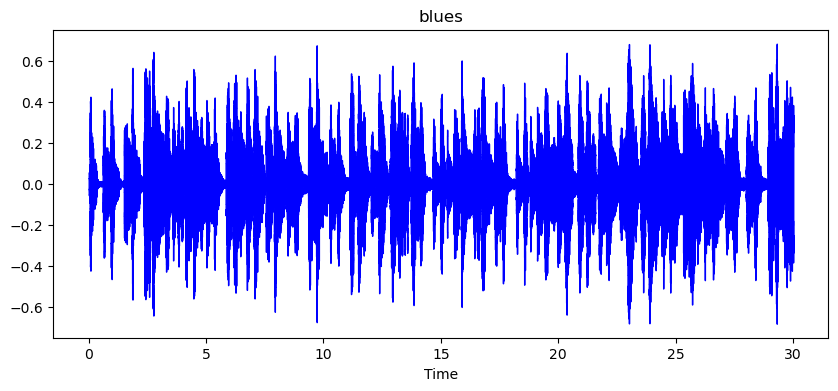

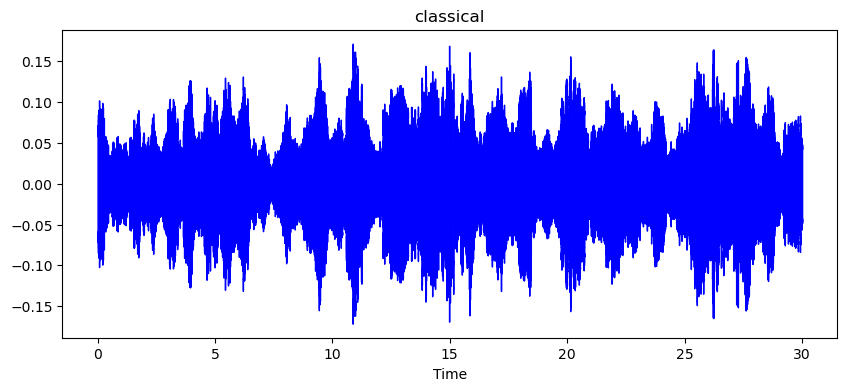

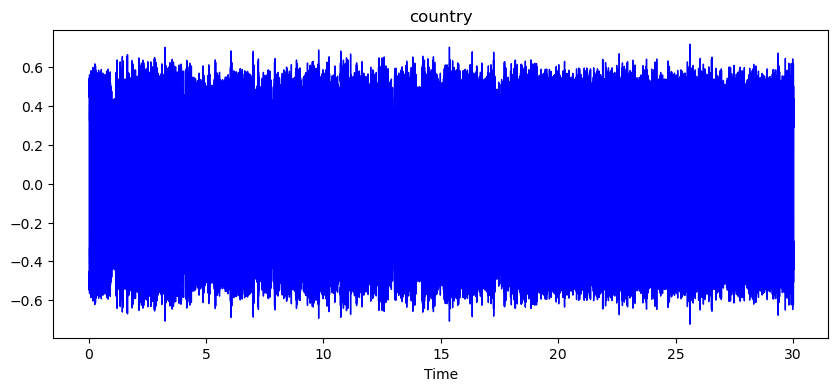

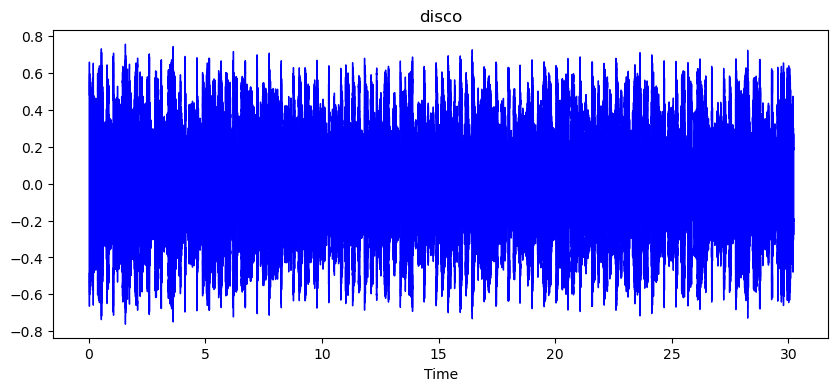

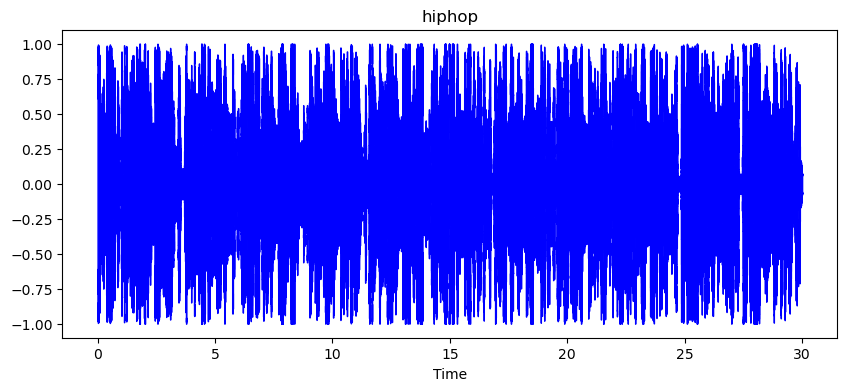

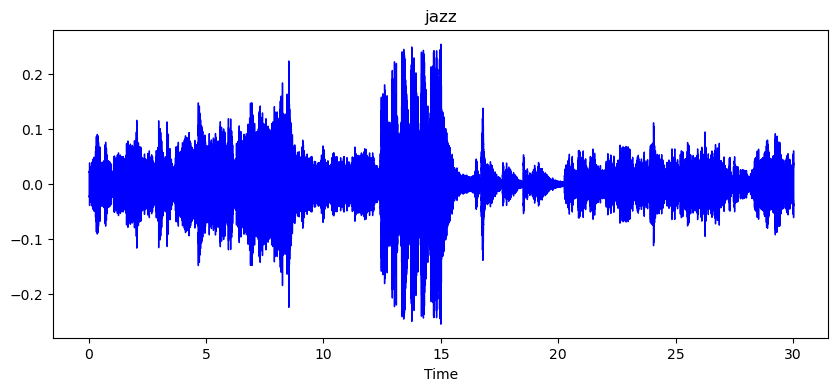

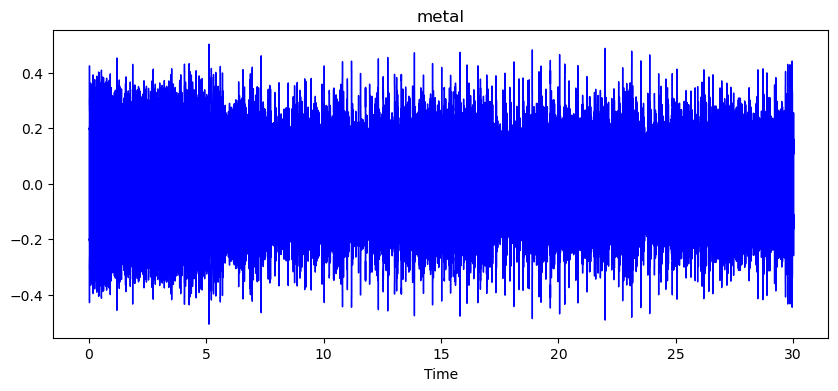

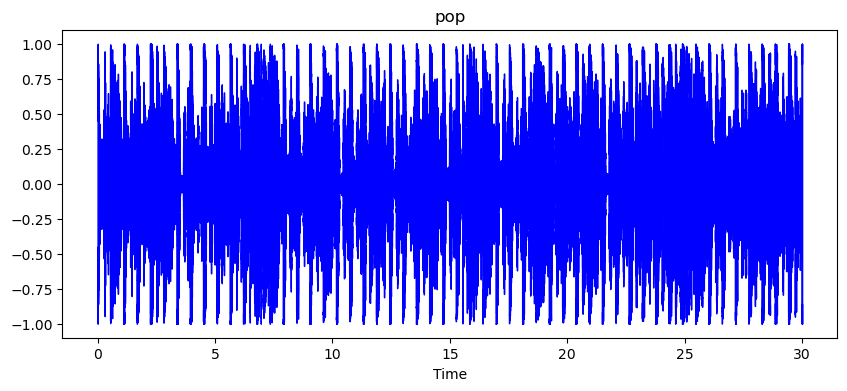

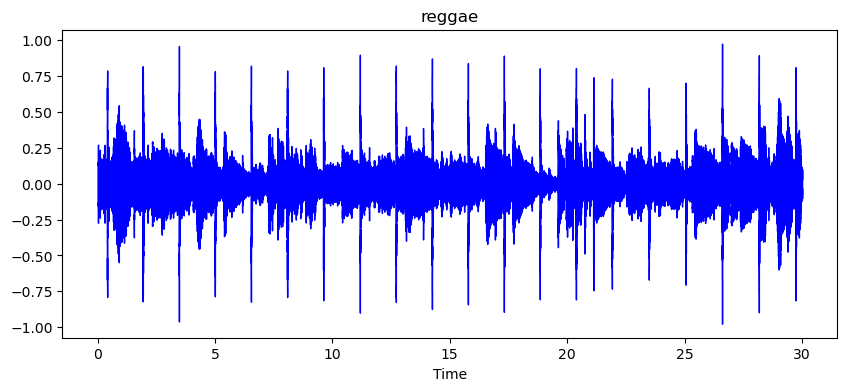

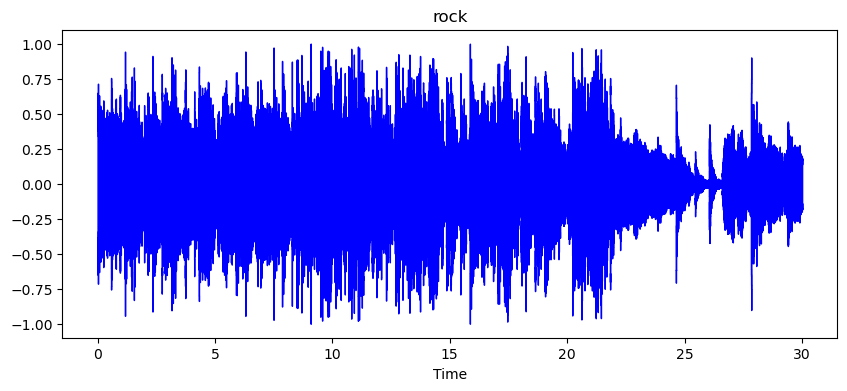

In [3]:
for genre in genres:
    audio, sr = librosa.load(os.path.join(path, 'genres_original', genre, f'{genre}.00001.wav'))
    plt.figure(figsize = (10, 4))
    librosa.display.waveshow(y = audio, sr = sr, color = 'b')
    plt.title(f'{genre}')

From the above, we can visually identify how each genre of music differs from each other based on the different patterns of amplitude of each audio signal. For example, country has an almost constant amplitude throughout the track whereas jazz has a highly erratic pattern.

## Fourier Transform

A Fourier transform (FT) is a mathematical transform that decomposes functions into frequency components, which are represented by the output of the transform as a function of frequency.The Fourier transform of a function is a complex-valued function representing the complex sinusoids that comprise the original function. For each frequency, the magnitude (absolute value) of the complex value represents the amplitude of a constituent complex sinusoid with that frequency, and the argument of the complex value represents that complex sinusoid's phase offset.

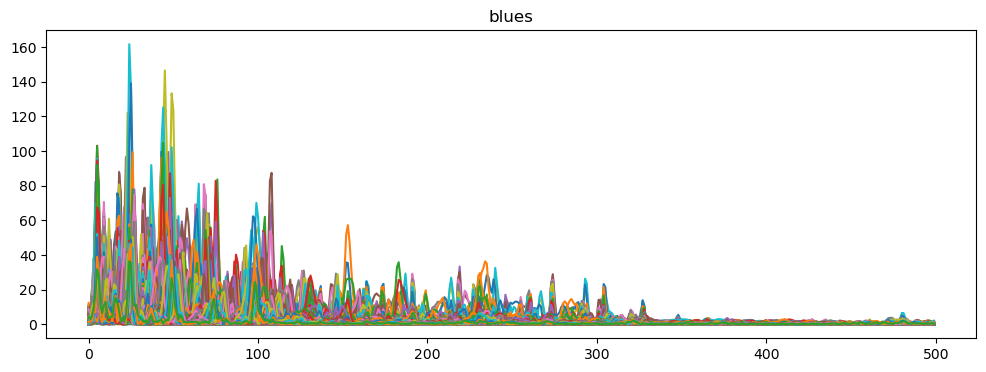

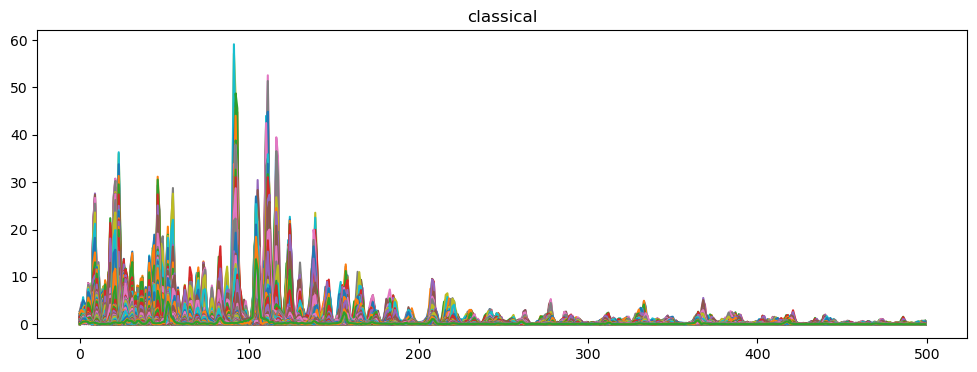

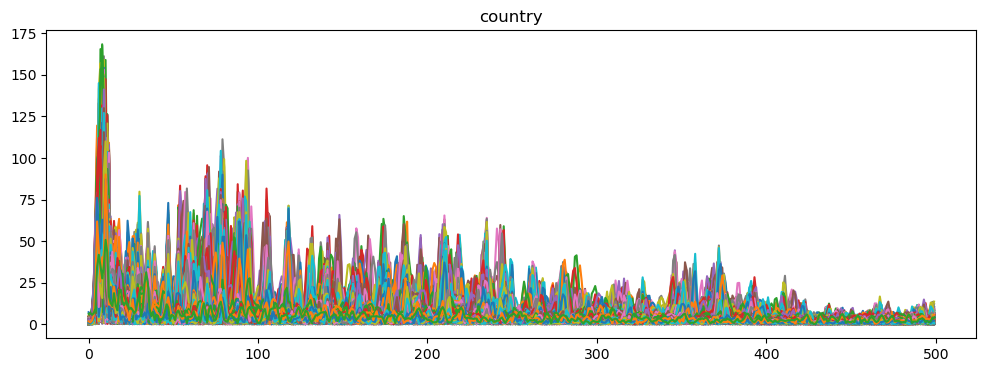

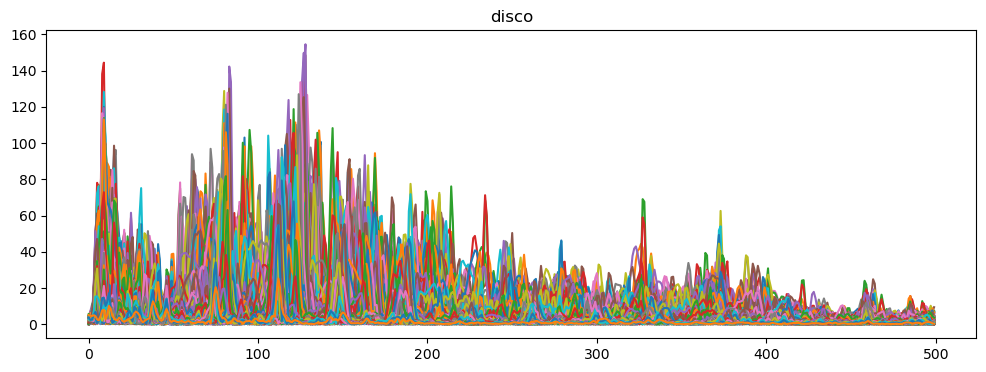

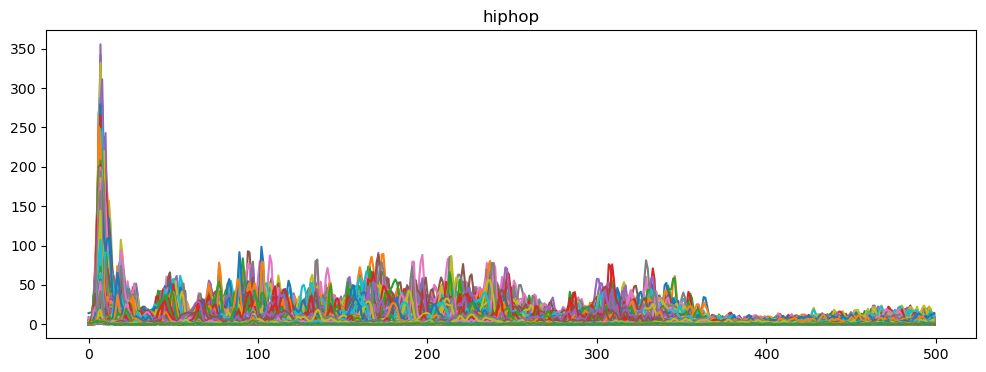

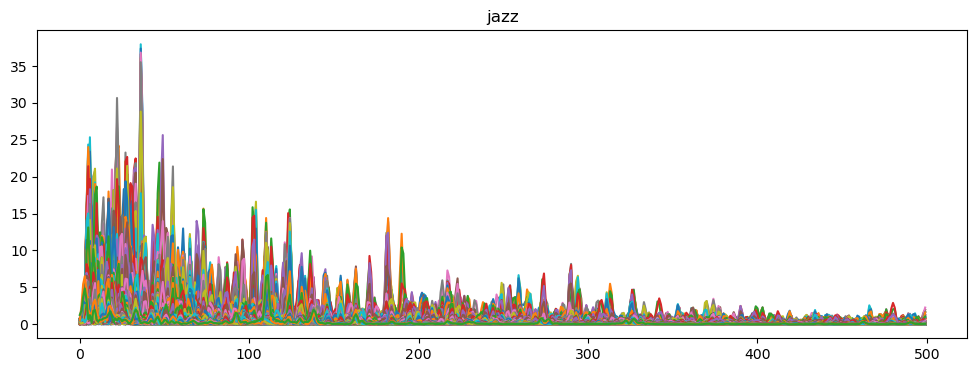

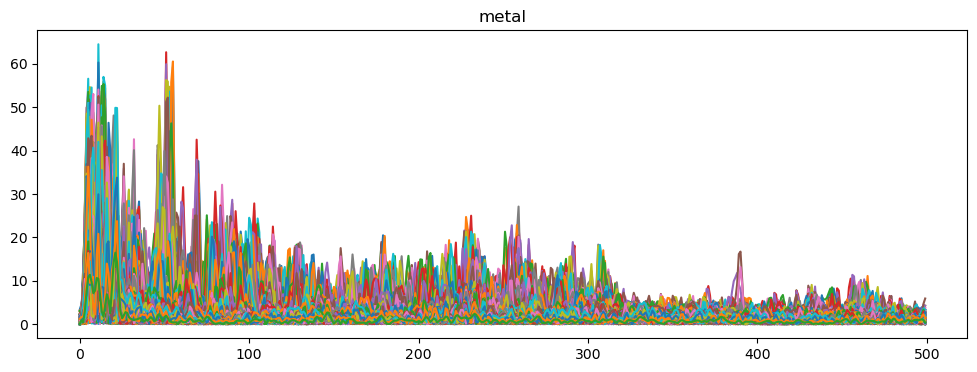

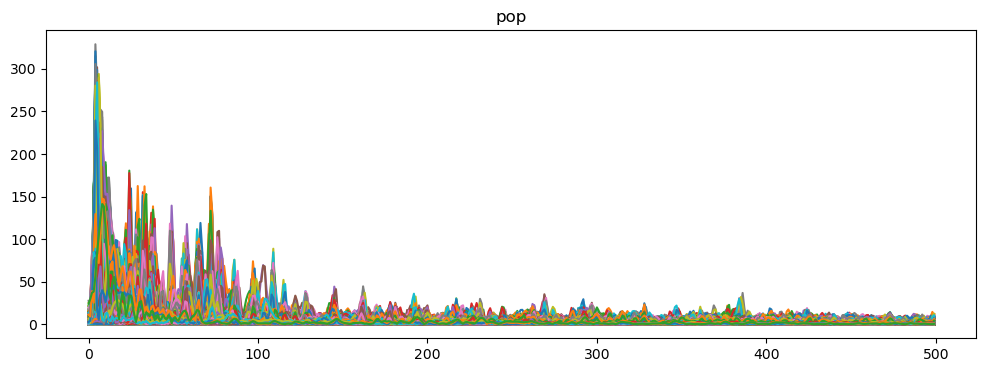

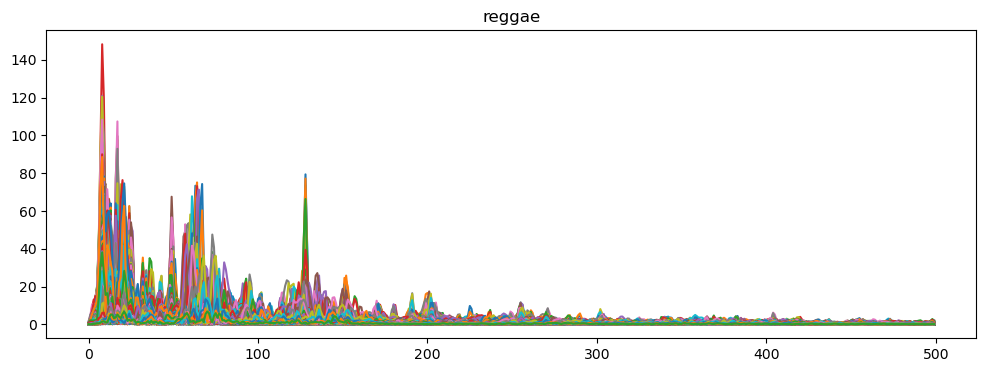

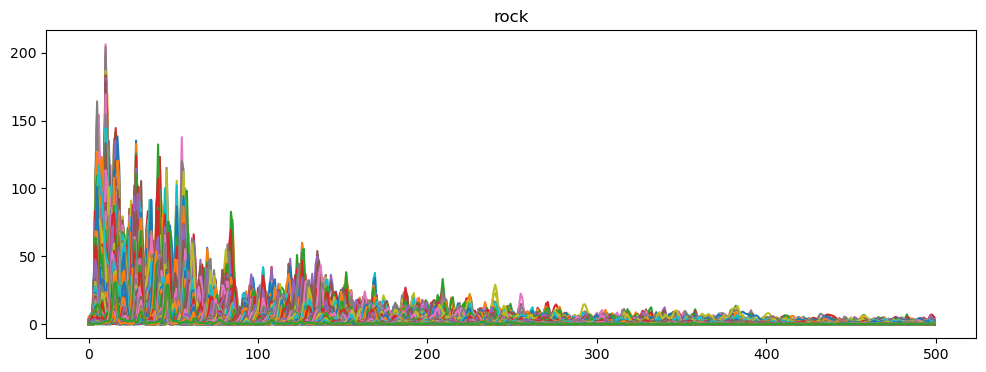

In [4]:
n_fft = 2048 
hop_length = 512 
win_length = 2048 

for genre in genres:
    audio, sr = librosa.load(os.path.join(path, 'genres_original', genre, f'{genre}.00001.wav'))
    aud_ft = np.abs(librosa.stft(audio, n_fft = n_fft, hop_length = hop_length, win_length = win_length))
    plt.figure(figsize = (12, 4))
    plt.plot(aud_ft[:500, :])
    plt.title(f'{genre}')

As we can observe, each genre has a different Fourier Transform although certain genres show a hint of similarity.For example, we can see that rock and pop have a nearly identical Fourier Transform.

## Mel Spectrogram

A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams. The frequency and amplitude axes can be either linear or logarithmic, depending on what the graph is being used for. Audio would usually be represented with a logarithmic amplitude axis (probably in decibels, or dB), and frequency would be linear to emphasize harmonic relationships, or logarithmic to emphasize musical, tonal relationships. A common format is a graph with two geometric dimensions: one axis represents time, and the other axis represents frequency; a third dimension indicating the amplitude of a particular frequency at a particular time is represented by the intensity or color of each point in the image.
<br>The Mel Scale, mathematically speaking, is the result of some non-linear transformation of the frequency scale. The Mel Spectrogram is a normal Spectrogram, but with a Mel Scale on the y axis.

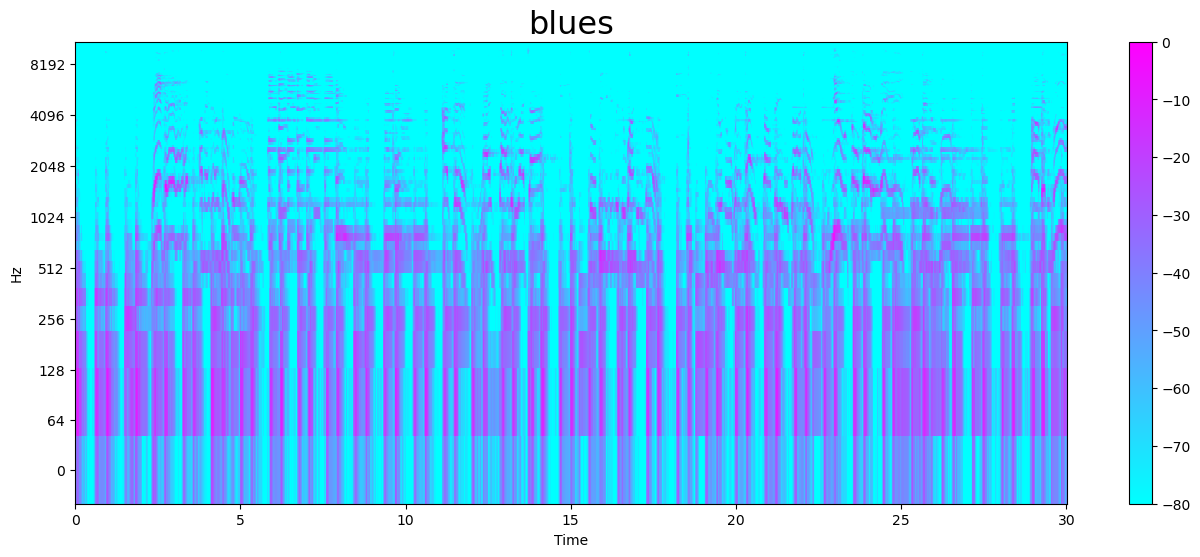

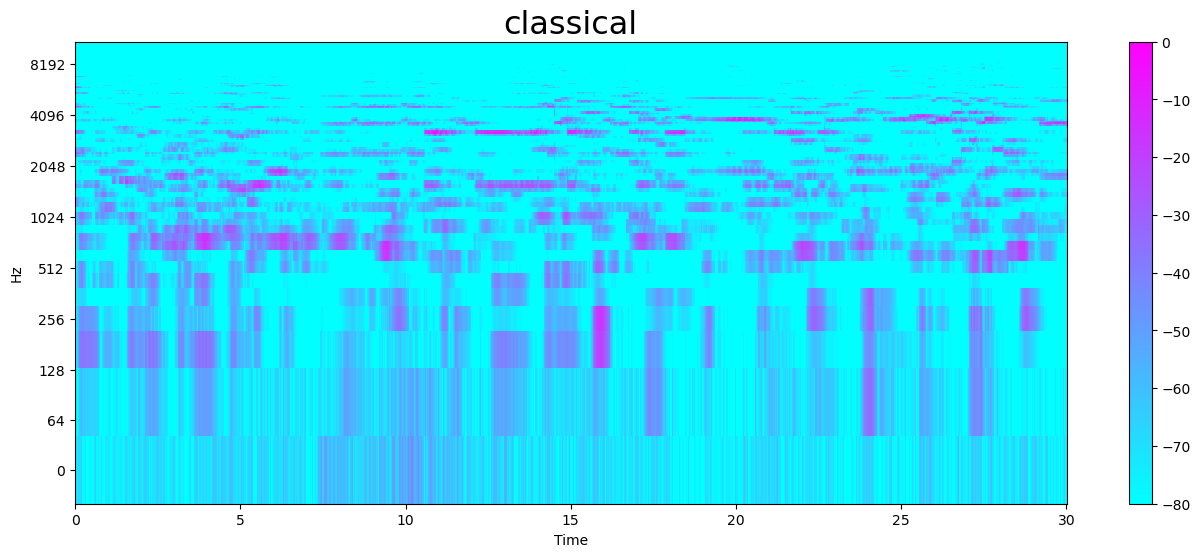

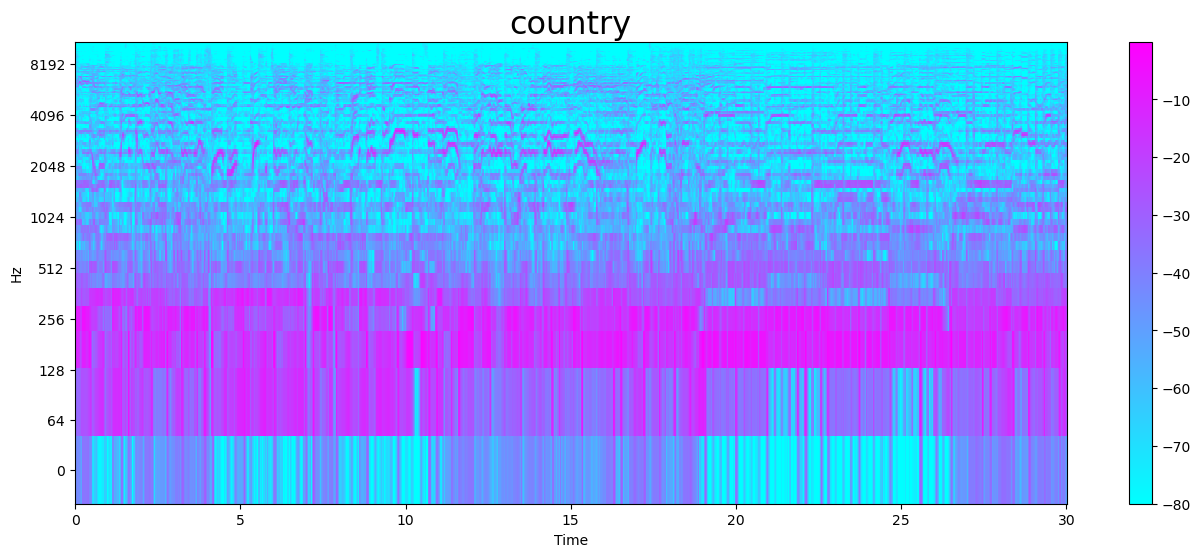

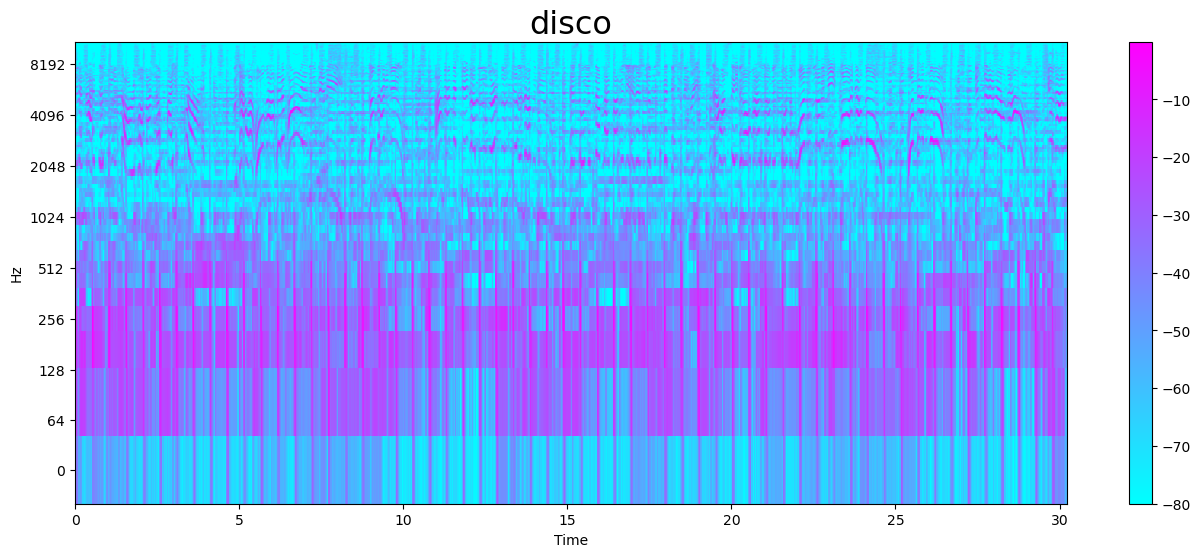

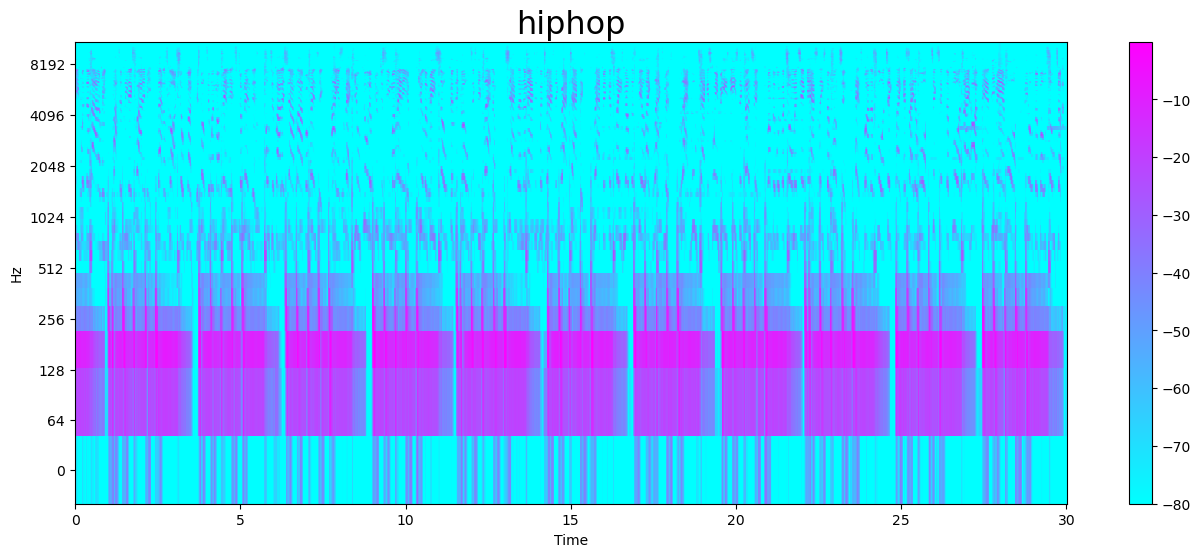

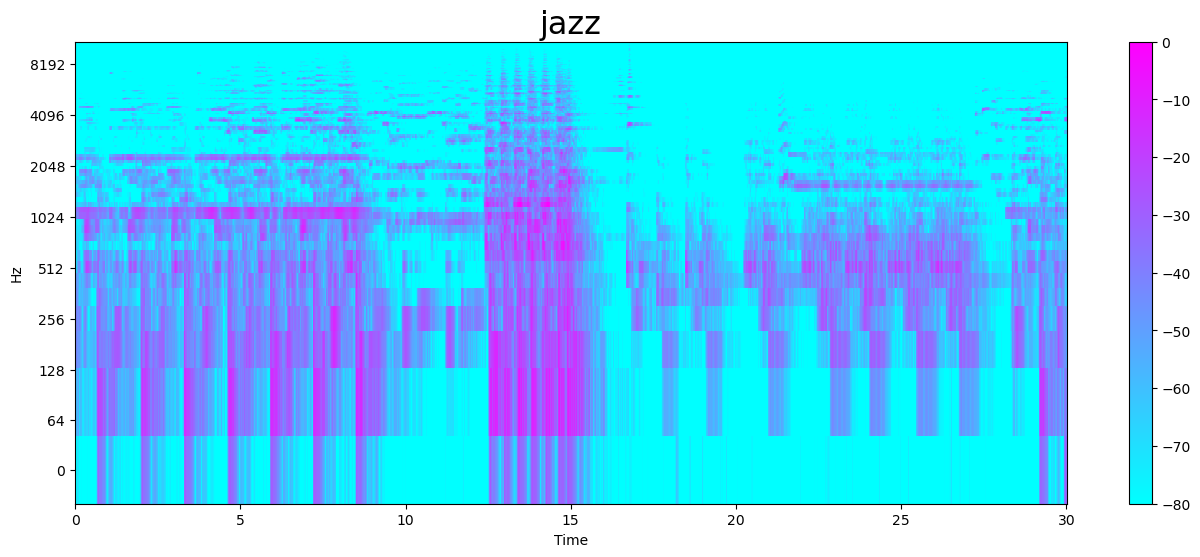

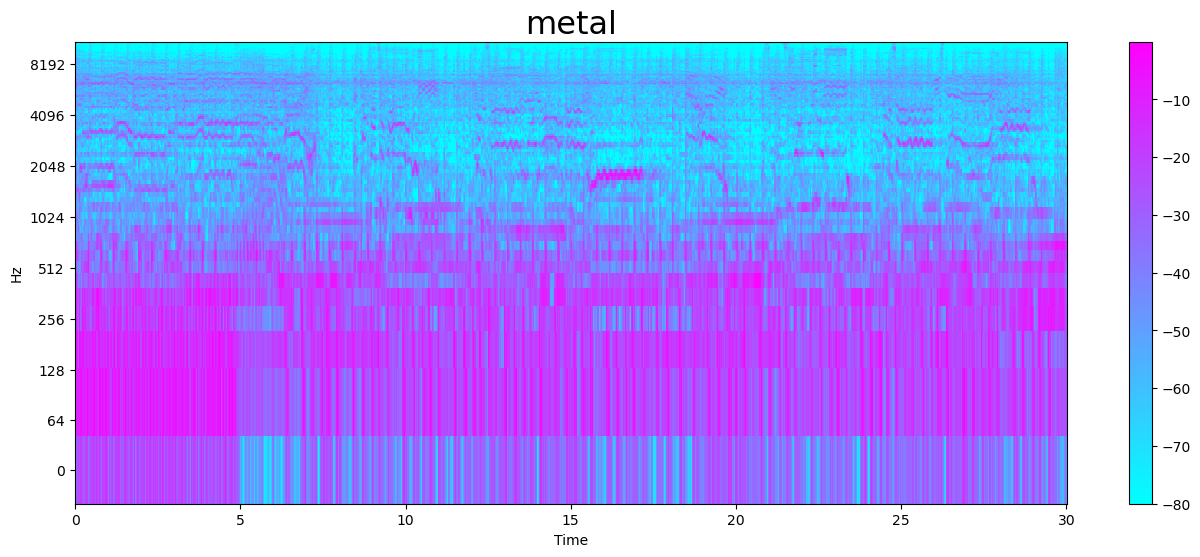

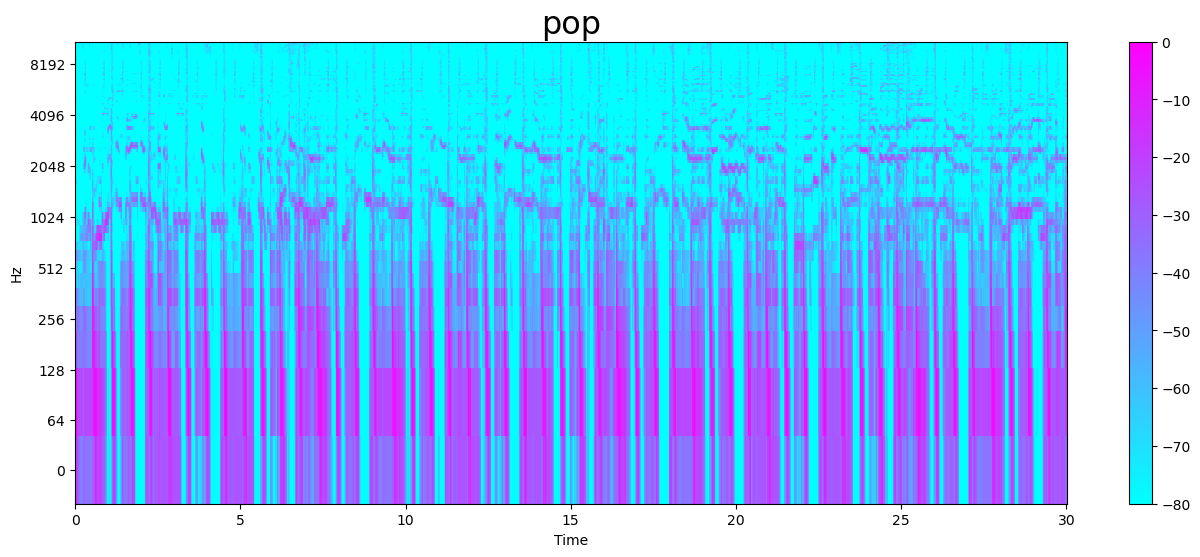

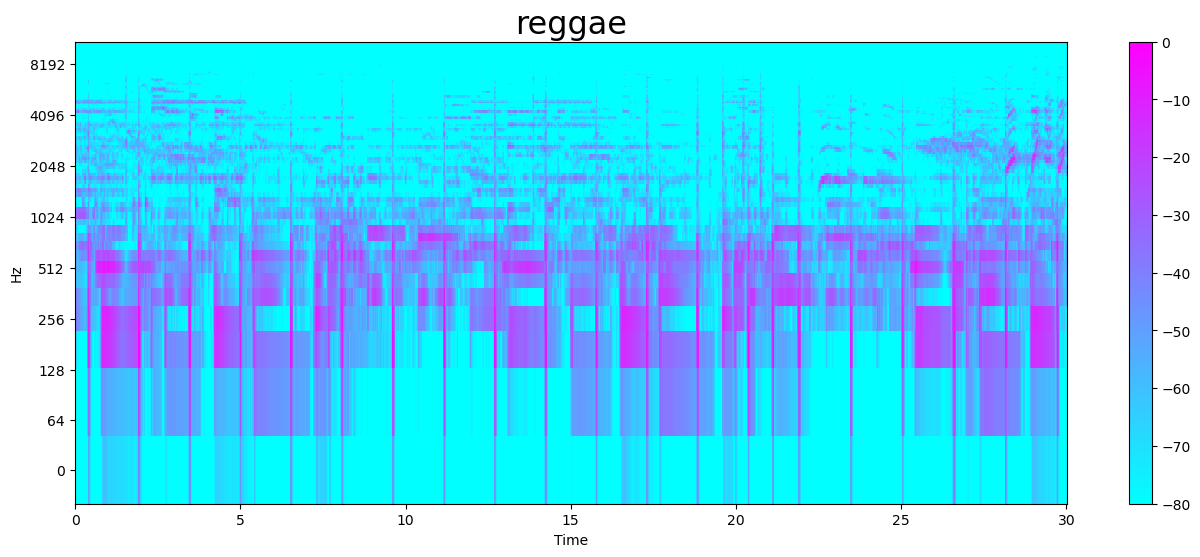

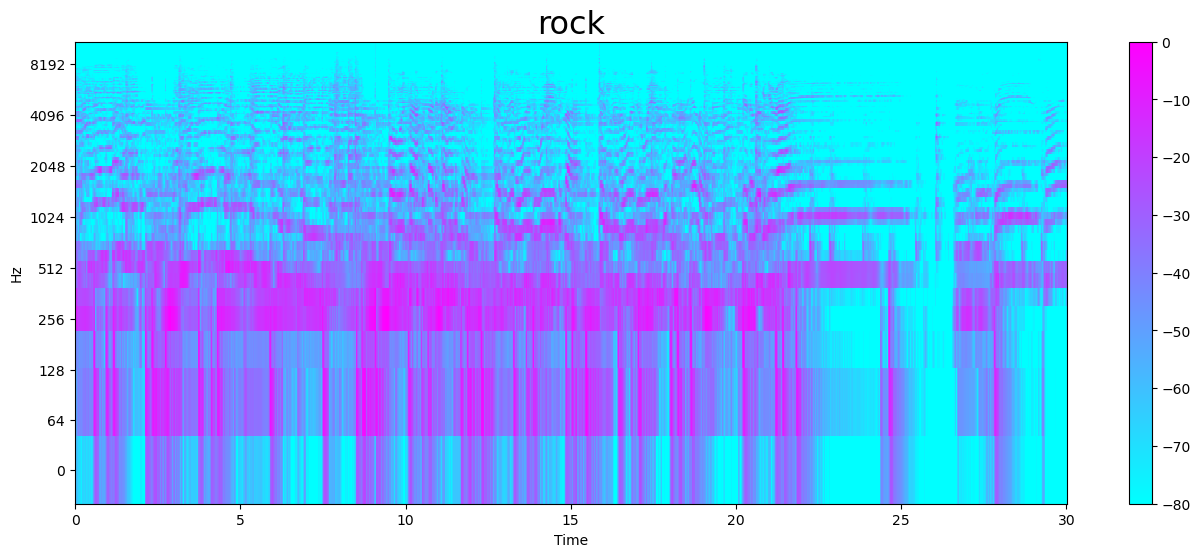

In [5]:
for genre in genres:
    audio, sr = librosa.load(os.path.join(path, 'genres_original', genre, f'{genre}.00001.wav'))
    audio, _ = librosa.effects.trim(audio)
    mel_spec = librosa.feature.melspectrogram(audio, sr = sr)
    mel_spec_db = librosa.amplitude_to_db(mel_spec, ref = np.max)
    plt.figure(figsize = (16, 6))
    librosa.display.specshow(mel_spec_db, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log', cmap = 'cool')
    plt.colorbar()
    plt.title(genre, fontsize = 23)

The mel spectrogram helps us in indentfying which range of frequencies is most prevalent in an audio signal. For example, hiphop has the range of 64-512 Hz with the highest amplitude and repeating in a pattern.

## Zero Crossing Rate

Zero Crossing Rate is the number of times a signal changes from positive to negative or back.

In [6]:
for genre in genres:
    audio, sr = librosa.load(os.path.join(path, 'genres_original', genre, f'{genre}.00001.wav'))
    zero_crossings = librosa.zero_crossings(audio, pad = False)
    print(genre, ':', sum(zero_crossings))

blues : 37139
classical : 58180
country : 84182
disco : 125793
hiphop : 64771
jazz : 39308
metal : 101272
pop : 98964
reggae : 42405
rock : 36426


## Tempo (BMP)

Tempo or BMP is the number of beats per minute.

In [7]:
for genre in genres:
    audio, sr = librosa.load(os.path.join(path, 'genres_original', genre, f'{genre}.00001.wav'))
    tempo, _ = librosa.beat.beat_track(audio, sr = sr)
    print(genre, ':', tempo)

blues : 67.99958881578948
classical : 112.34714673913044
country : 129.19921875
disco : 117.45383522727273
hiphop : 92.28515625
jazz : 135.99917763157896
metal : 78.30255681818181
pop : 107.666015625
reggae : 151.99908088235293
rock : 151.99908088235293


## Chroma Features

Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

It is a powerful tool for analyzing music features whose pitches can be meaningfully categorized and whose tuning approximates to the equal-tempered scale. One main property of chroma features is that they capture harmonic and melodic characteristics of music while being robust to changes in timbre and instrumentation.

blues Chromogram shape: (12, 133)
classical Chromogram shape: (12, 133)
country Chromogram shape: (12, 133)
disco Chromogram shape: (12, 134)
hiphop Chromogram shape: (12, 133)
jazz Chromogram shape: (12, 133)
metal Chromogram shape: (12, 133)
pop Chromogram shape: (12, 133)
reggae Chromogram shape: (12, 133)
rock Chromogram shape: (12, 133)


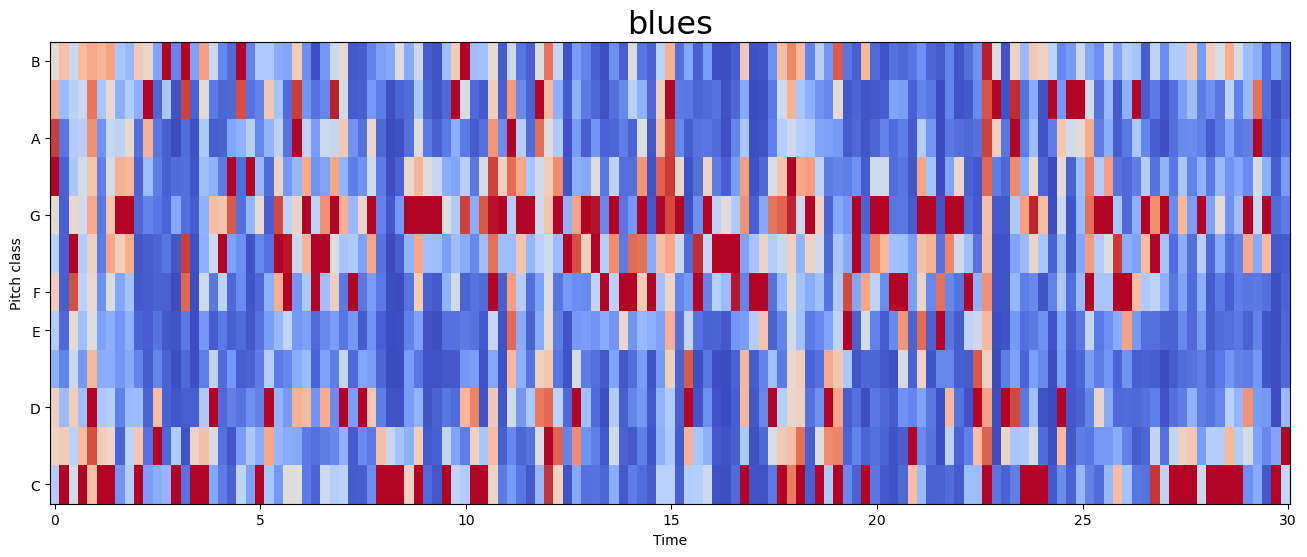

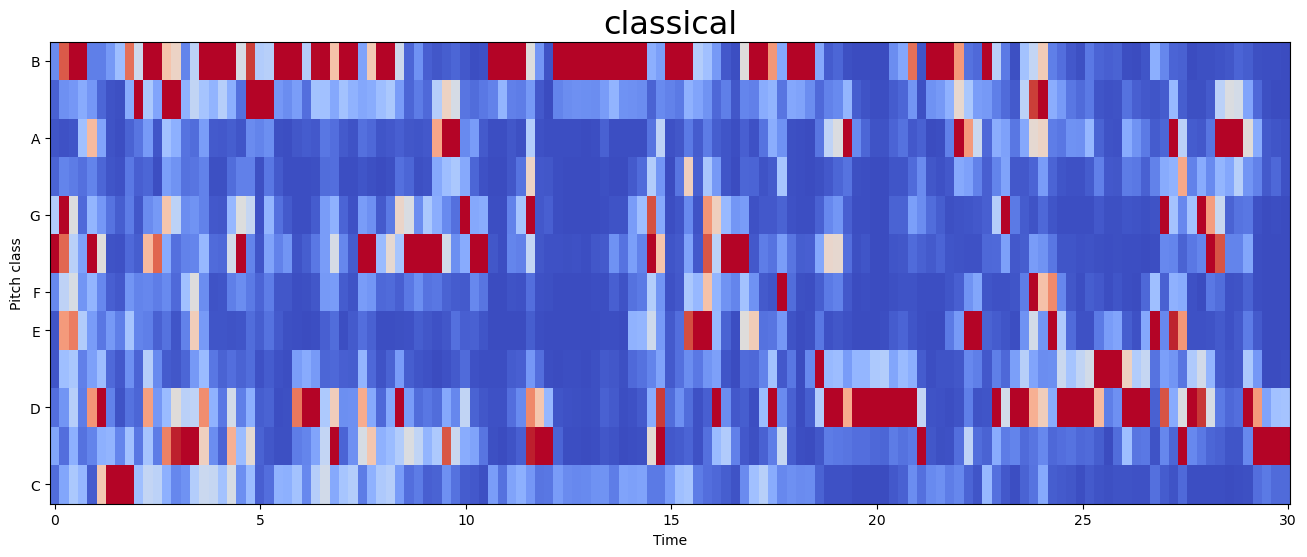

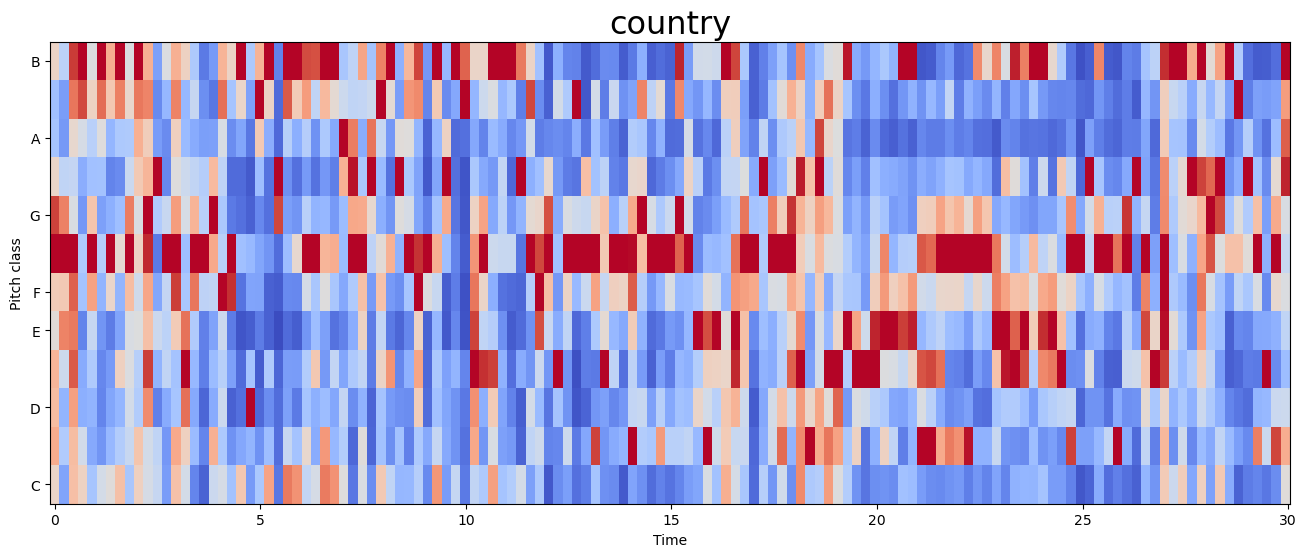

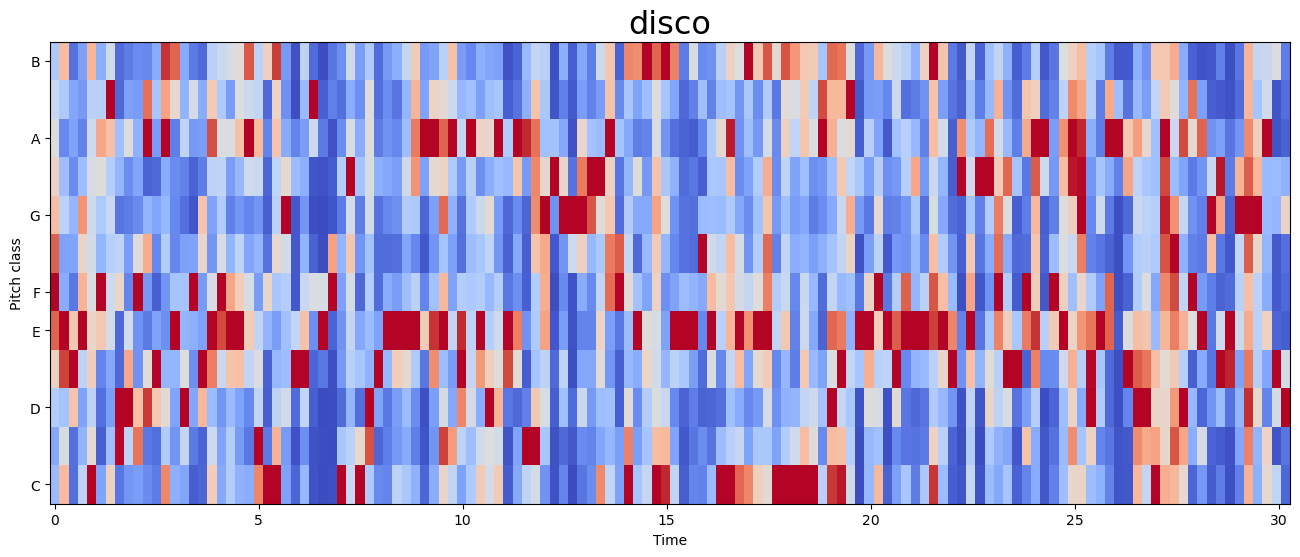

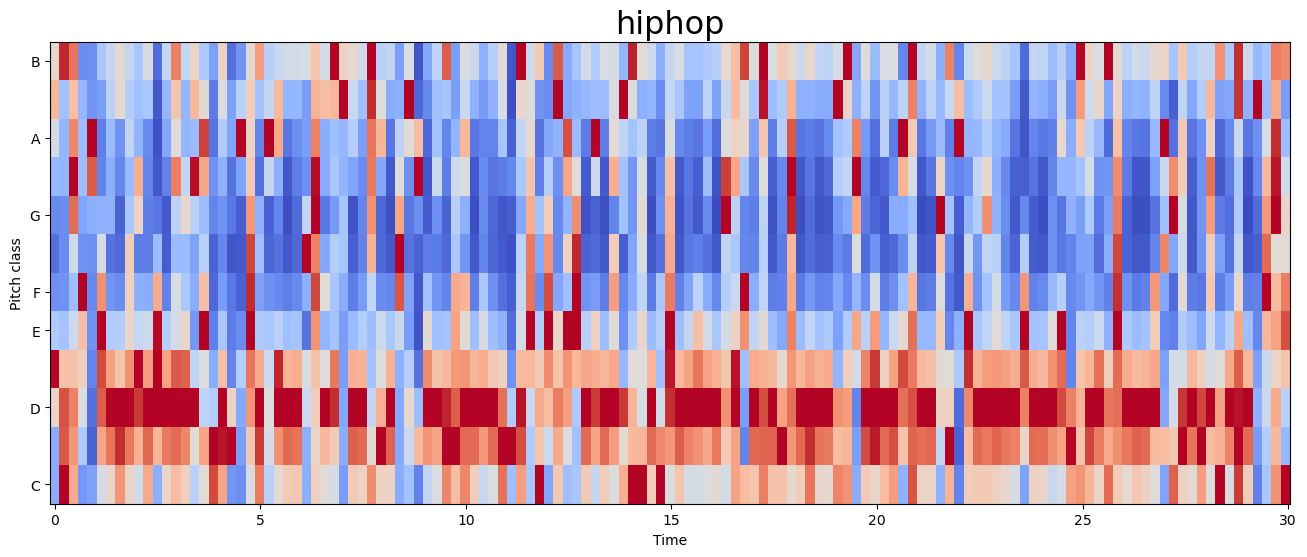

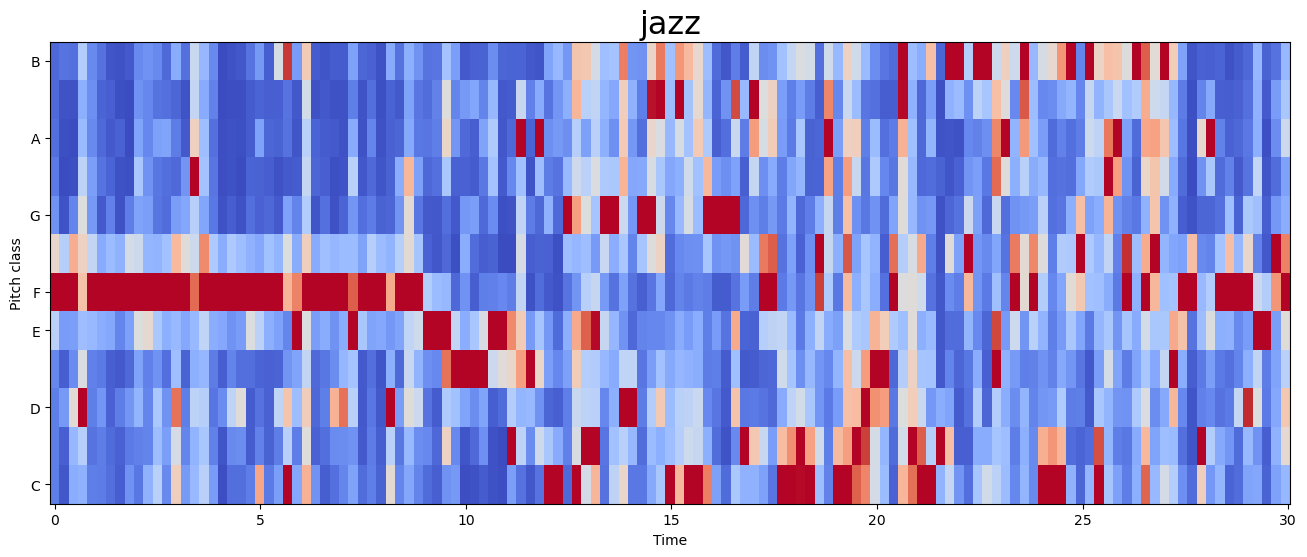

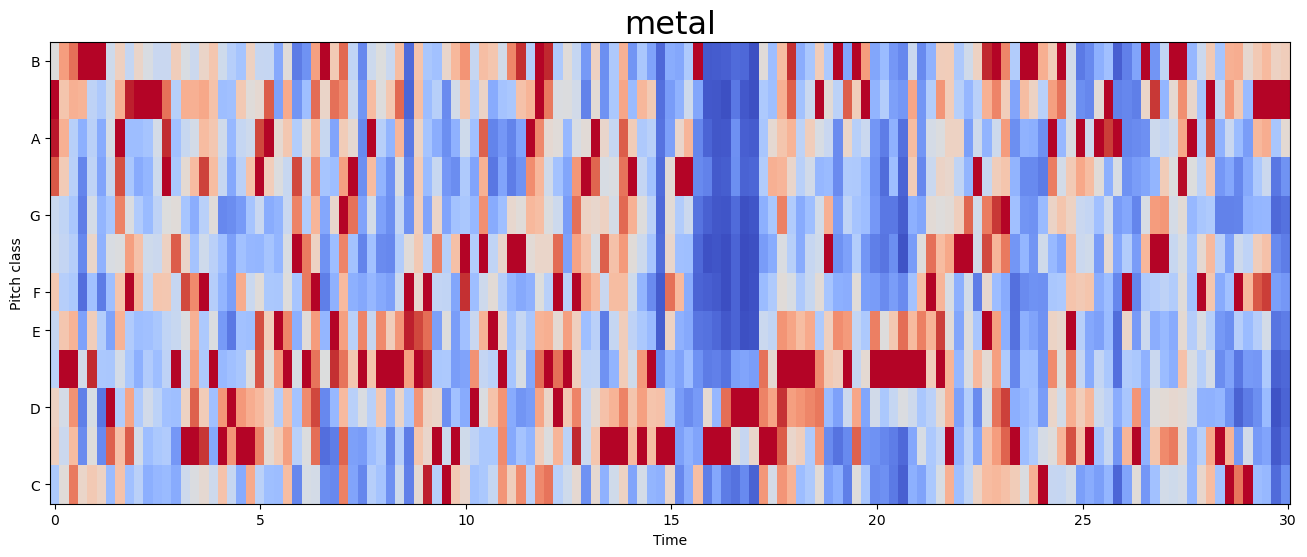

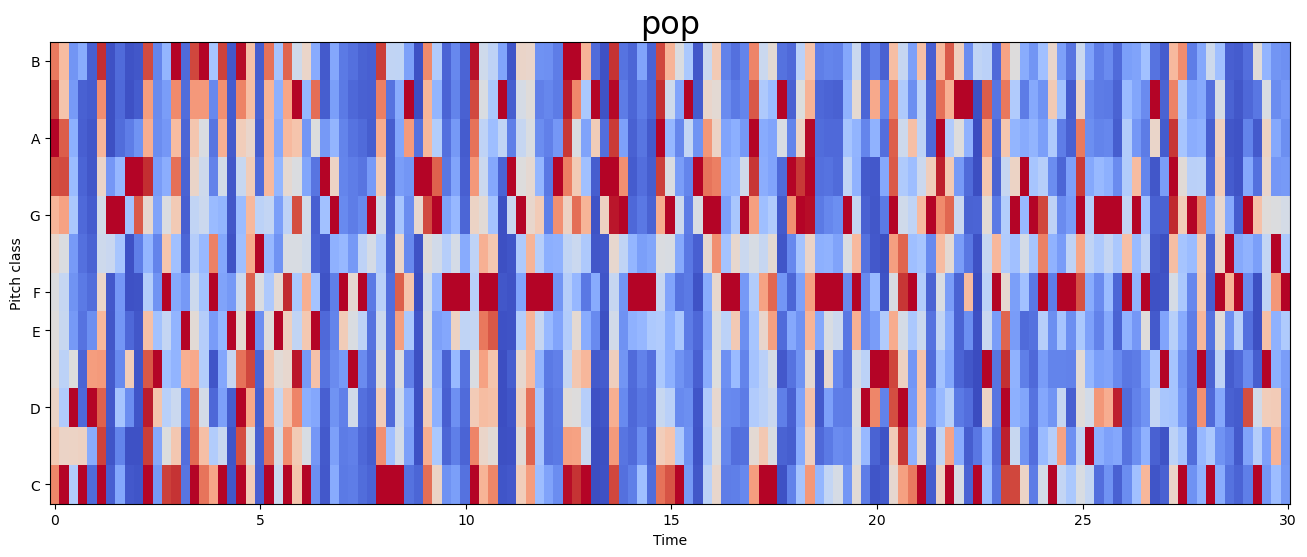

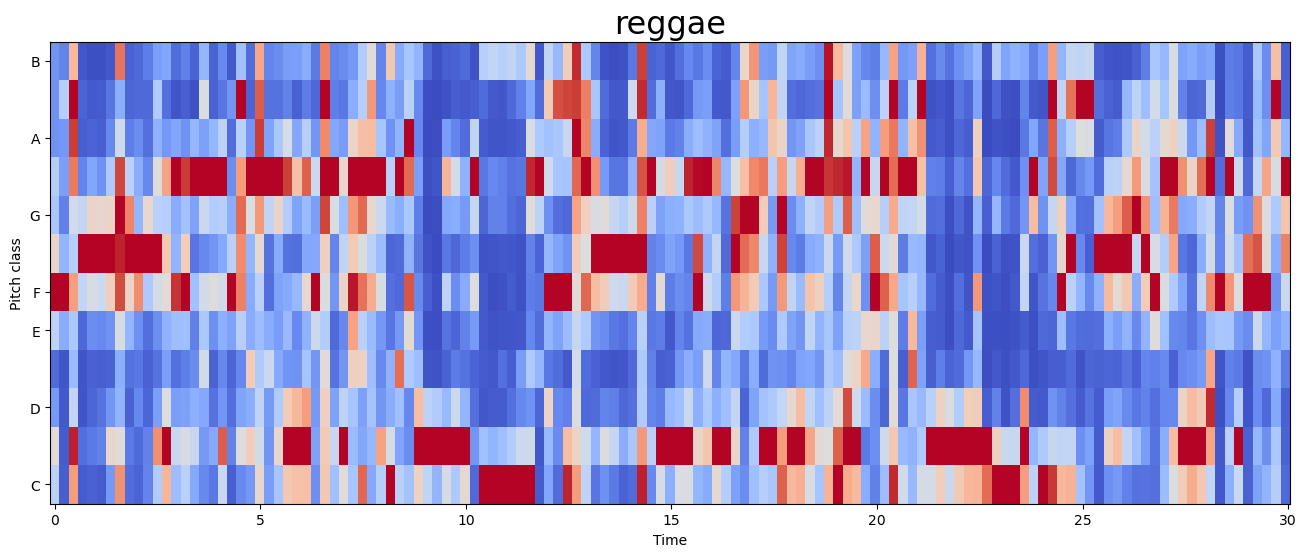

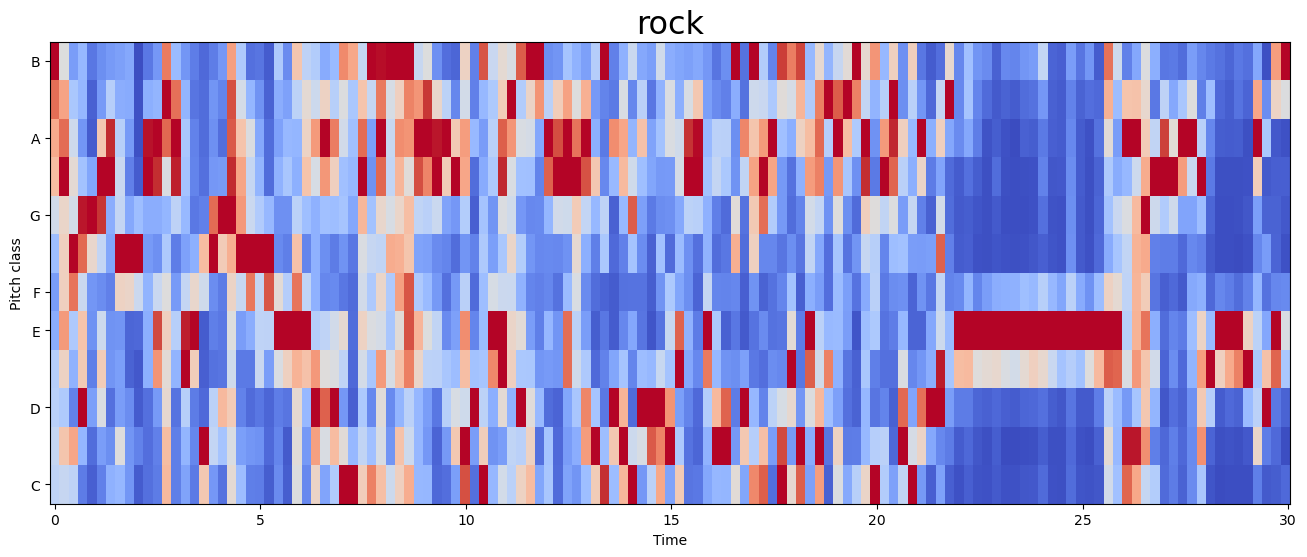

In [8]:
for genre in genres:
    audio, sr = librosa.load(os.path.join(path, 'genres_original', genre, f'{genre}.00001.wav'))
    hop_length = 5000
    chromagram = librosa.feature.chroma_stft(audio, sr = sr, hop_length = hop_length)
    print(genre, 'Chromogram shape:', chromagram.shape)
    plt.figure(figsize = (16, 6))
    librosa.display.specshow(chromagram, x_axis = 'time', y_axis = 'chroma', hop_length = hop_length, cmap = 'coolwarm')
    plt.title(genre, fontsize = 23)

## Correlation between features

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0, 0.5, 'chroma_stft_mean'),
  Text(0, 1.5, 'rms_mean'),
  Text(0, 2.5, 'spectral_centroid_mean'),
  Text(0, 3.5, 'spectral_bandwidth_mean'),
  Text(0, 4.5, 'rolloff_mean'),
  Text(0, 5.5, 'zero_crossing_rate_mean'),
  Text(0, 6.5, 'harmony_mean'),
  Text(0, 7.5, 'perceptr_mean'),
  Text(0, 8.5, 'mfcc1_mean'),
  Text(0, 9.5, 'mfcc2_mean'),
  Text(0, 10.5, 'mfcc3_mean'),
  Text(0, 11.5, 'mfcc4_mean'),
  Text(0, 12.5, 'mfcc5_mean'),
  Text(0, 13.5, 'mfcc6_mean'),
  Text(0, 14.5, 'mfcc7_mean'),
  Text(0, 15.5, 'mfcc8_mean'),
  Text(0, 16.5, 'mfcc9_mean'),
  Text(0, 17.5, 'mfcc10_mean'),
  Text(0, 18.5, 'mfcc11_mean'),
  Text(0, 19.5, 'mfcc12_mean'),
  Text(0, 20.5, 'mfcc13_mean'),
  Text(0, 21.5, 'mfcc14_mean'),
  Text(0, 22.5, 'mfcc15_mean'),
  Text(0, 23.5, 'mfcc16_mean'),
  Text(0, 24.5, 

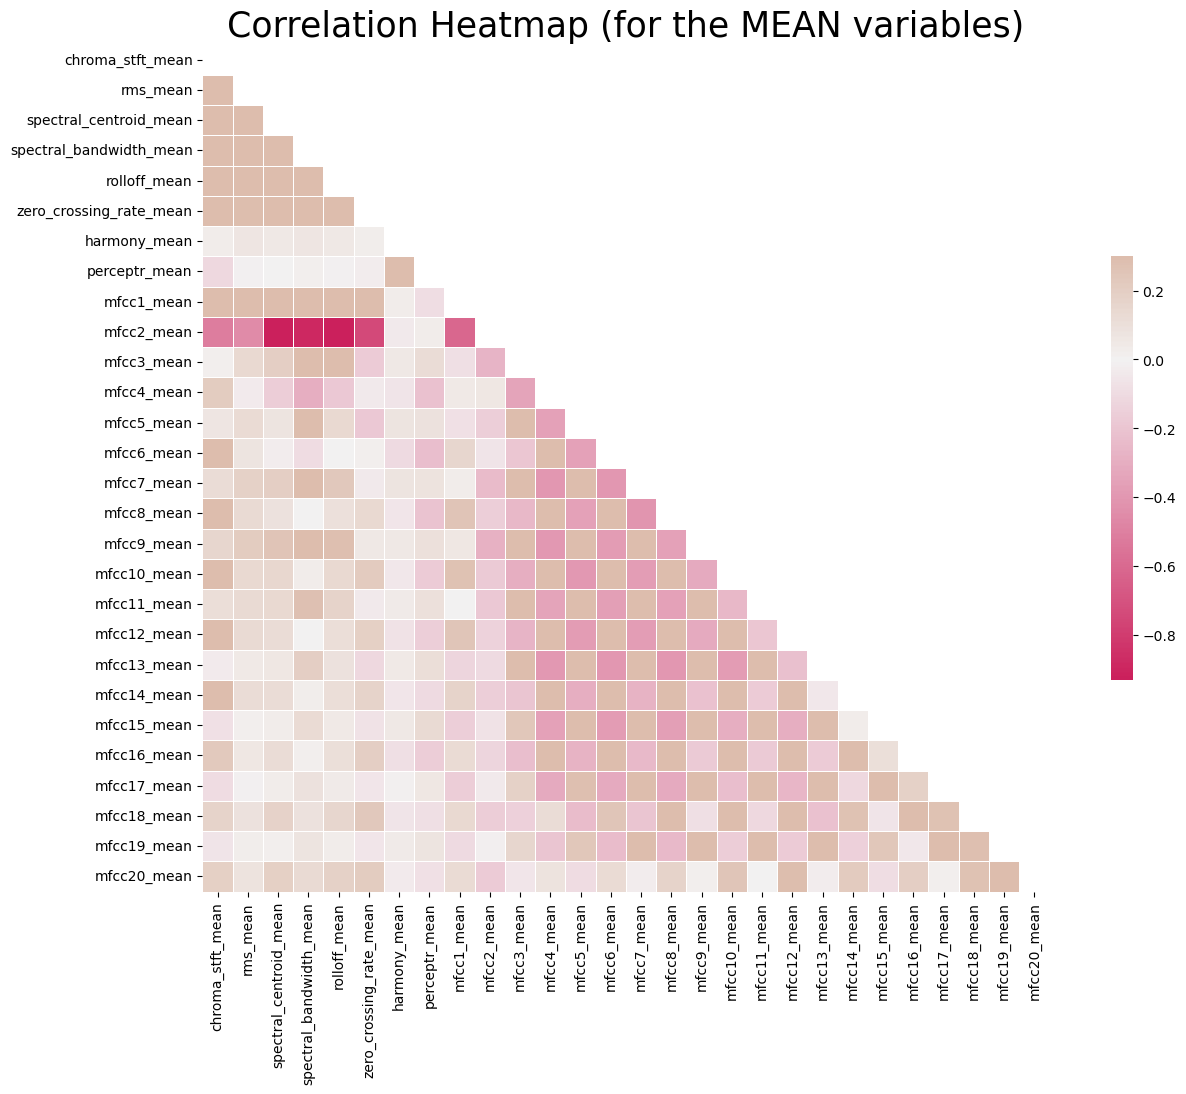

In [11]:
data = pd.read_csv(os.path.join(path, 'features_3_sec.csv'))

spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

mask = np.triu(np.ones_like(corr, dtype = np.bool))

f, ax = plt.subplots(figsize = (16, 11));

cmap = sns.diverging_palette(0, 25, as_cmap = True, s = 90, l = 45, n = 5)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 0.3, center = 0,
            square = True, linewidths = 0.5, cbar_kws = {'shrink': 0.5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

Text(0, 0.5, 'BPM')

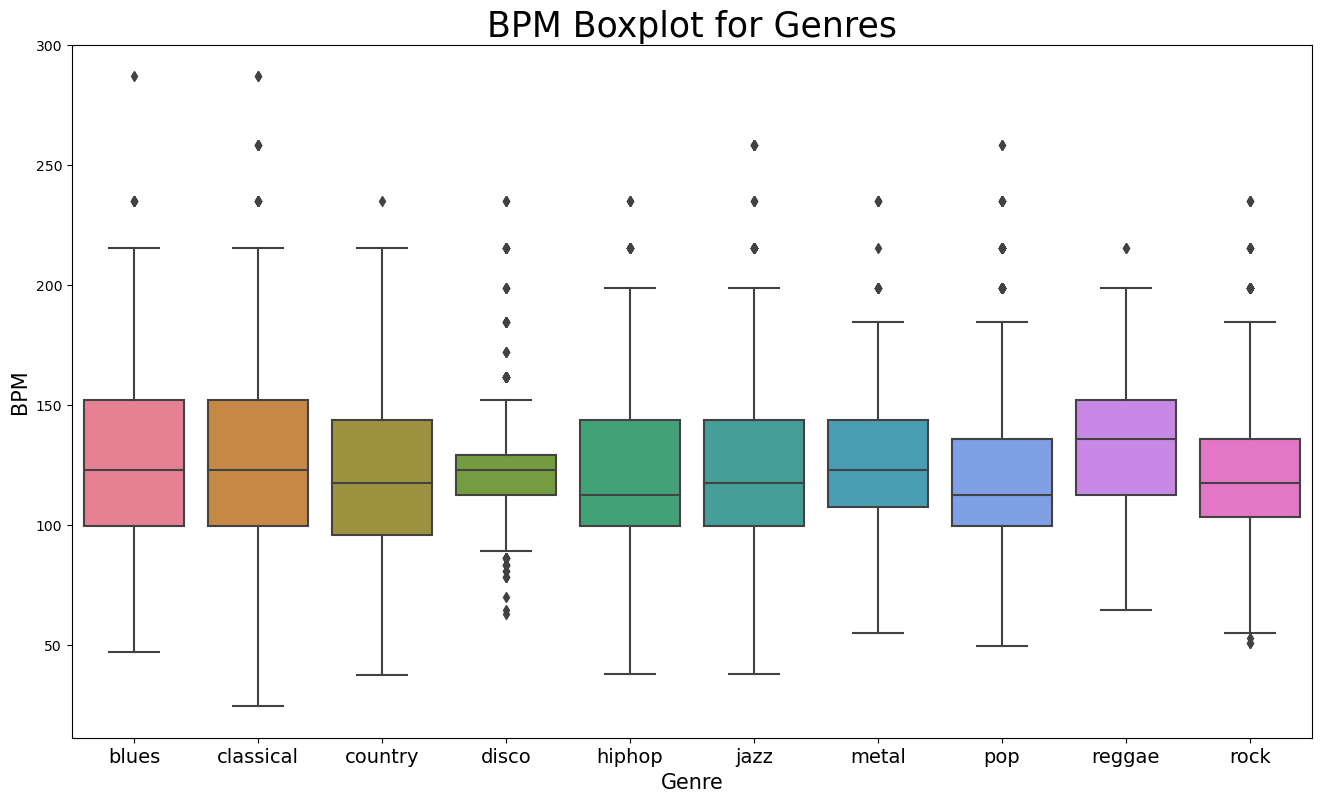

In [12]:
x = data[['label', 'tempo']]

f, ax = plt.subplots(figsize = (16, 9));
sns.boxplot(x = 'label', y = 'tempo', data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('BPM', fontsize = 15)